#### **Importing Module**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

#### **Load Data**

In [ ]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
df.shape

(400, 9)

#### **Data Preprocessing**

In [ ]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop("Serial No.",axis=1,inplace=True)

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

#### **Train, Test & Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### **Feature Scaling**

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [ ]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

#### **Build Neural Network**

In [ ]:
model = Sequential()

model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


#### **Compile the Model**

In [ ]:
model.compile(loss="mean_squared_error",optimizer="Adam")

#### **Training the Model**

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0792 - val_loss: 0.0590
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0520 - val_loss: 0.0393
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.0310
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0291
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0292 - val_loss: 0.0272
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.0248
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0240 - val_loss: 0.0229
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.0213
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 0.0198
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0183
Epoch 11/100
8/8 [==========

#### **Prediction**

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[0.6903974 ],
       [0.6787006 ],
       [0.8144549 ],
       [0.8012217 ],
       [0.85085297],
       [0.67044306],
       [0.6341121 ],
       [0.5722499 ],
       [0.5251933 ],
       [0.89819646],
       [0.8214267 ],
       [0.9389081 ],
       [0.9060362 ],
       [0.64403564],
       [0.7108322 ],
       [0.6922792 ],
       [0.7902054 ],
       [0.89906466],
       [0.47100252],
       [0.7166209 ],
       [0.6811968 ],
       [0.7977631 ],
       [0.8296512 ],
       [0.91655475],
       [0.67994946],
       [0.51433575],
       [0.7299154 ],
       [0.70229787],
       [0.90088433],
       [0.6683252 ],
       [0.9573079 ],
       [0.6395589 ],
       [0.7413332 ],
       [0.7717161 ],
       [0.73336107],
       [0.66904014],
       [0.44645917],
       [0.6479439 ],
       [0.9075277 ],
       [0.70323277],
       [0.83924615],
       [0.6920068 ],
       [0.9158024 ],
       [0.63675344],
       [0.9685657 ],
       [0.6223196 ],
       [0.7358557 ],
       [0.835

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.7992403338160196

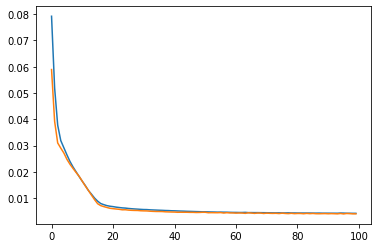

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])